# Import libraries & data

In [4]:
import pyspark as spark
from pyspark.sql import SparkSession
import pyspark.sql.types
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
spark = SparkSession.builder \
        .appName("EDA") \
        .config("spark.sql.debug.maxToStringFields", 1000) \
        .getOrCreate()

In [6]:
gcs_path = 'gs://pstat135-voter-file/VM2Uniform'

nv =  spark.read.parquet(gcs_path + "/" + "VM2Uniform--NV--2021-06-13")

In [7]:
nv.printSchema()

root
 |-- SEQUENCE: string (nullable = true)
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Voters_StateVoterID: string (nullable = true)
 |-- Voters_CountyVoterID: string (nullable = true)
 |-- VoterTelephones_LandlineAreaCode: string (nullable = true)
 |-- VoterTelephones_Landline7Digit: string (nullable = true)
 |-- VoterTelephones_LandlineFormatted: string (nullable = true)
 |-- VoterTelephones_LandlineUnformatted: string (nullable = true)
 |-- VoterTelephones_LandlineConfidenceCode: string (nullable = true)
 |-- VoterTelephones_CellPhoneOnly: string (nullable = true)
 |-- VoterTelephones_CellPhoneFormatted: string (nullable = true)
 |-- VoterTelephones_CellPhoneUnformatted: string (nullable = true)
 |-- VoterTelephones_CellConfidenceCode: string (nullable = true)
 |-- Voters_FirstName: string (nullable = true)
 |-- Voters_MiddleName: string (nullable = true)
 |-- Voters_LastName: string (nullable = true)
 |-- Voters_NameSuffix: string (

# Data Cleaning & Selection

In [9]:
target_cols = ['Voters_Age',
               'Voters_Gender',
               'Parties_Description',
               'General_2020',
               'Ethnic_Description',
               'CommercialData_Education',
               'CommercialData_DwellingType',
               'CommercialData_AreaMedianHousingValue',
               'CommercialData_AreaMedianEducationYears',
              'CommercialData_EstimatedHHIncomeAmount'
              ]

In [18]:
nv_df = nv.select(*target_cols)

In [19]:
nv_df.printSchema()

root
 |-- Voters_Age: string (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- General_2020: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_DwellingType: string (nullable = true)
 |-- CommercialData_AreaMedianHousingValue: string (nullable = true)
 |-- CommercialData_AreaMedianEducationYears: string (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: string (nullable = true)



In [20]:
from pyspark.sql.functions import col, sum

# function to count nulls per column
def count_nulls_per_column(df):
    null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
    return null_counts

count_nulls_per_column(nv_df).toPandas()

,Voters_Age,Voters_Gender,Parties_Description,General_2020,Ethnic_Description,CommercialData_Education,CommercialData_DwellingType,CommercialData_AreaMedianHousingValue,CommercialData_AreaMedianEducationYears,CommercialData_EstimatedHHIncomeAmount
0,1445,32554,0,521381,173902,893078,229827,82518,82382,61407


In [21]:
count_nulls_per_column(test_df).toPandas()

,Ethnic_Description,CommercialData_DwellingType,CommercialData_AreaMedianHousingValue,CommercialData_Occupation,CommercialData_OccupationGroup,CommercialData_AreaMedianEducationYears
0,173902,229827,82518,970121,989141,82382


In [22]:
# View df in pandas df for clarity
nv_pd = nv_df.toPandas()
nv_pd.head(15)

,Voters_Age,Voters_Gender,Parties_Description,General_2020,Ethnic_Description,CommercialData_Education,CommercialData_DwellingType,CommercialData_AreaMedianHousingValue,CommercialData_AreaMedianEducationYears,CommercialData_EstimatedHHIncomeAmount
0,52,F,Republican,Y,English/Welsh,None,Multi-Family Dwelling,$224999,12,$64908
1,65,F,American Independent,None,German,None,Multi-Family Dwelling,$224999,12,$64908
2,35,F,Republican,None,Hispanic,Less than HS Diploma - Likely,Single Family Dwelling Unit,$224999,12,$6000
3,33,F,Republican,None,English/Welsh,HS Diploma - Extremely Likely,Single Family Dwelling Unit,$224999,12,$6000
4,19,M,Non-Partisan,None,English/Welsh,None,None,$224999,12,$64908
5,24,M,American Independent,None,English/Welsh,None,None,$224999,12,$64908
6,53,F,Non-Partisan,None,Irish,None,Single Family Dwelling Unit,$224999,12,$64908
7,59,F,Republican,Y,None,Bach Degree - Extremely Likely,Single Family Dwelling Unit,$224999,12,$64908
8,69,M,Republican,Y,None,HS Diploma - Likely,Single Family Dwelling Unit,$224999,12,$64908
9,56,M,Libertarian,Y,Scots,None,Single Family Dwelling Unit,$224999,12,$100000


In [23]:
from pyspark.sql.types import IntegerType

# Update the housing value column by removing the dollar sign
nv_df = nv_df.withColumn(
    "CommercialData_AreaMedianHousingValue", 
    regexp_replace(col("CommercialData_AreaMedianHousingValue"), 
                   "\\$", "")
)

# Update the HH income column by removing the dollar sign
nv_df = nv_df.withColumn(
    "CommercialData_EstimatedHHIncomeAmount", 
    regexp_replace(col("CommercialData_EstimatedHHIncomeAmount"), 
                   "\\$", "")
)

# Cast the following columns to IntegerType
columns_to_cast = ["Voters_Age",
                   "CommercialData_AreaMedianEducationYears",
                   "CommercialData_AreaMedianHousingValue",
                   "CommercialData_EstimatedHHIncomeAmount"
                  ]

for col_name in columns_to_cast:
    nv_df = nv_df.withColumn(
        col_name, 
        nv_df[col_name].cast(IntegerType())
    )

# Create a new column called "label" based on the value of "General_2020"
nv_df = nv_df.withColumn("label", 
                         when(nv_df.General_2020 == "Y", 1).otherwise(0)
                        )

# Remove the "General_2020" column and any rows with missing values
nv_df = nv_df.drop("General_2020").dropna()

In [24]:
# from pyspark.sql.types import IntegerType

# # Update the income column by removing the dollar sign
# nv_df = nv_df.withColumn(
#     "CommercialData_EstimatedHHIncomeAmount", 
#     regexp_replace(col("CommercialData_EstimatedHHIncomeAmount"), 
#                    "\\$", "")
# )

# # Cast the following columns to IntegerType
# columns_to_cast = ["Residence_Addresses_Property_LandSq_Footage", 
#                    "Voters_Age", 
#                    "CommercialData_EstimatedHHIncomeAmount"
#                   ]

# for col_name in columns_to_cast:
#     nv_df = nv_df.withColumn(
#         col_name, 
#         nv_df[col_name].cast(IntegerType())
#     )

# # Create a new column called "label" based on the value of "General_2020"
# nv_df = nv_df.withColumn("label", 
#                          when(nv_df.General_2020 == "Y", 1).otherwise(0)
#                         )

# # Remove the "General_2020" column and any rows with missing values
# nv_df = nv_df.drop("General_2020").dropna()

In [25]:
# Check count of updated nv_df 
nv_df.count()

844817

In [26]:
# Check schema of updated nv_df
nv_df.printSchema()

root
 |-- Voters_Age: integer (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_DwellingType: string (nullable = true)
 |-- CommercialData_AreaMedianHousingValue: integer (nullable = true)
 |-- CommercialData_AreaMedianEducationYears: integer (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: integer (nullable = true)
 |-- label: integer (nullable = false)



In [27]:
# View df in pandas df for clarity
nv_pd = nv_df.toPandas()
nv_pd.head(15)

,Voters_Age,Voters_Gender,Parties_Description,Ethnic_Description,CommercialData_Education,CommercialData_DwellingType,CommercialData_AreaMedianHousingValue,CommercialData_AreaMedianEducationYears,CommercialData_EstimatedHHIncomeAmount,label
0,35,F,Republican,Hispanic,Less than HS Diploma - Likely,Single Family Dwelling Unit,224999,12,6000,0
1,33,F,Republican,English/Welsh,HS Diploma - Extremely Likely,Single Family Dwelling Unit,224999,12,6000,0
2,81,F,Republican,Norwegian,Less than HS Diploma - Likely,Single Family Dwelling Unit,224999,12,100000,1
3,56,M,Republican,English/Welsh,HS Diploma - Likely,Single Family Dwelling Unit,224999,12,17000,1
4,57,F,Republican,English/Welsh,Some College -Extremely Likely,Single Family Dwelling Unit,224999,12,17000,1
5,42,M,Republican,Hispanic,Some College - Likely,Single Family Dwelling Unit,224999,12,64908,0
6,53,F,Republican,English/Welsh,HS Diploma - Likely,Multi-Family Dwelling,224999,12,61000,1
7,77,M,Republican,English/Welsh,Bach Degree - Extremely Likely,Multi-Family Dwelling,224999,12,61000,1
8,65,M,Democratic,Hispanic,HS Diploma - Extremely Likely,Single Family Dwelling Unit,224999,12,75000,1
9,24,F,Non-Partisan,Indian/Hindu,Some College - Likely,Single Family Dwelling Unit,224999,12,75000,0


In [28]:
nv_pd.dtypes

Voters_Age                                  int32
Voters_Gender                              object
Parties_Description                        object
Ethnic_Description                         object
CommercialData_Education                   object
CommercialData_DwellingType                object
CommercialData_AreaMedianHousingValue       int32
CommercialData_AreaMedianEducationYears     int32
CommercialData_EstimatedHHIncomeAmount      int32
label                                       int32
dtype: object

In [29]:
# Show the distinct values for each column
for column in nv_pd.columns:
    print(column)
    print(nv_pd[column].unique())

Voters_Age
[35 33 81 56 57 42 53 77 65 24 62 63 79 26 59 30 37 22 55 39 84 86 23 61
 31 85 46 68 71 66 51 28 88 44 40 82 54 60 64 49 45 67 32 73 74 25 58 78
 19 27 76 80 72 21 20 50 47 36 52 75 69 34 38 29 70 91 48 43 41 83 87 94
 90 92 18 89 98 95 93 96 97 99]
Voters_Gender
['F' 'M']
Parties_Description
['Republican' 'Democratic' 'Non-Partisan' 'American Independent'
 'Libertarian' 'Other' 'Green' 'Natural Law']
Ethnic_Description
['Hispanic' 'English/Welsh' 'Norwegian' 'Indian/Hindu' 'Scots' 'German'
 'Irish' 'French' 'Arab' 'Likely Af-Am (Modeled)' 'Greek' 'Polish'
 'Italian' 'Russian (omitting former Soviet States)' 'Dutch (Netherlands)'
 'Swedish' 'Czech' 'Hungarian' 'Vietnamese' 'Austrian' 'Finnish'
 'Japanese' 'Armenian' 'Danish' 'Romanian' 'Lithuanian' 'Filipino'
 'Korean' 'Belgian' 'Chinese' 'Hawaiian' 'Native American' 'Pakistani'
 'Ukrainian' 'Turkish' 'Portuguese' 'Byelorussian' 'Laotian' 'Khmer'
 'Estonian' 'Slovakian' 'Serbian' 'Unknown Asian' 'Slovenian' 'Croatian'
 'Per

# Model Building

Our Research Question: 

- How does socioeconomic status (education, income, religion, etc ) affect voter turnout?
    - How does property (household, land) ownership affect voter turnouts or patterns?
    - How does education level relate to voter alignment or patterns?
    - How would age and gender relate to voter alignment or patterns?


## Feature Engineering

**String-index:** `Voters_Gender`, `Parties_Description`, `CommercialData_Education`

In [30]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

# Define the categorical columns and their output column names
cat_cols = [('Voters_Gender', 'Voters_Gender_idx'),
            ('Parties_Description', 'Parties_Description_idx'),
            ('Ethnic_Description', 'Ethnic_Description_idx'),
            ('CommercialData_DwellingType', 'CommercialData_DwellingType_idx'),
            ('CommercialData_Education', 'CommercialData_Education_idx')]

nv_indexed = nv_df

# Iterate over the categorical columns
for input_col, output_col in cat_cols:
    # Define the StringIndexer and fit it to the data
    indexer = StringIndexer(inputCol=input_col, outputCol=output_col).fit(nv_indexed)
    
    # Transform the data using the fitted StringIndexer
    nv_indexed = indexer.transform(nv_indexed)

# Convert the 'Voters_Gender_idx' column to a numeric column
nv_indexed = nv_indexed.withColumn('Voters_Gender_idx', nv_indexed['Voters_Gender_idx'].cast('double'))
nv_indexed = nv_indexed.withColumn('Parties_Description_idx', nv_indexed['Parties_Description_idx'].cast('double'))
nv_indexed = nv_indexed.withColumn('Ethnic_Description_idx', nv_indexed['Ethnic_Description_idx'].cast('double'))
nv_indexed = nv_indexed.withColumn('CommercialData_DwellingType_idx', nv_indexed['CommercialData_DwellingType_idx'].cast('double'))
nv_indexed = nv_indexed.withColumn('CommercialData_Education_idx', nv_indexed['CommercialData_Education_idx'].cast('double'))

# Print the schema to verify that all one-hot encoded columns have been added
nv_indexed.printSchema()

root
 |-- Voters_Age: integer (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_DwellingType: string (nullable = true)
 |-- CommercialData_AreaMedianHousingValue: integer (nullable = true)
 |-- CommercialData_AreaMedianEducationYears: integer (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: integer (nullable = true)
 |-- label: integer (nullable = false)
 |-- Voters_Gender_idx: double (nullable = false)
 |-- Parties_Description_idx: double (nullable = false)
 |-- Ethnic_Description_idx: double (nullable = false)
 |-- CommercialData_DwellingType_idx: double (nullable = false)
 |-- CommercialData_Education_idx: double (nullable = false)



**One-hot encoder:** `Voters_Gender_idx`, `Parties_Description_idx`, `CommercialData_Education_idx`

In [42]:
# Define the categorical columns and their output column names
cat_cols_encoded = [('Voters_Gender_idx', 'Voters_Gender_encoded'),
            ('Parties_Description_idx', 'Parties_Description_encoded'),
            ('Ethnic_Description_idx', 'Ethnic_Description_encoded'),
            ('CommercialData_DwellingType_idx', 'CommercialData_DwellingType_encoded'),
            ('CommercialData_Education_idx', 'CommercialData_Education_encoded')]

nv_onehot = nv_indexed

onehot = OneHotEncoder(inputCol='Voters_Gender_idx', outputCol='Voters_Gender_encoded')
nv_onehot = onehot.fit(nv_onehot).transform(nv_onehot)

onehot = OneHotEncoder(inputCol='Parties_Description_idx', outputCol='Parties_Description_encoded')
nv_onehot = onehot.fit(nv_onehot).transform(nv_onehot)

onehot = OneHotEncoder(inputCol='Ethnic_Description_idx', outputCol='Ethnic_Description_encoded')
nv_onehot = onehot.fit(nv_onehot).transform(nv_onehot)

onehot = OneHotEncoder(inputCol='CommercialData_DwellingType_idx', outputCol='CommercialData_DwellingType_encoded')
nv_onehot = onehot.fit(nv_onehot).transform(nv_onehot)

onehot = OneHotEncoder(inputCol='CommercialData_Education_idx', outputCol='CommercialData_Education_encoded')
nv_onehot = onehot.fit(nv_onehot).transform(nv_onehot)

# Print the schema to verify that all one-hot encoded columns have been added
nv_onehot.printSchema()

root
 |-- Voters_Age: integer (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_DwellingType: string (nullable = true)
 |-- CommercialData_AreaMedianHousingValue: integer (nullable = true)
 |-- CommercialData_AreaMedianEducationYears: integer (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: integer (nullable = true)
 |-- label: integer (nullable = false)
 |-- Voters_Gender_idx: double (nullable = false)
 |-- Parties_Description_idx: double (nullable = false)
 |-- Ethnic_Description_idx: double (nullable = false)
 |-- CommercialData_DwellingType_idx: double (nullable = false)
 |-- CommercialData_Education_idx: double (nullable = false)
 |-- Voters_Gender_encoded: vector (nullable = true)
 |-- Parties_Description_encoded: vector (nullable = true)
 |-- Ethnic_Description_encoded: vector (

**Assembler:** `Voters_Gender_encoded`,`Parties_Description_encoded`, `CommercialData_Education_encoded`, `Voters_Age`,`Residence_Addresses_Property_LandSq_Footage`,`CommercialData_EstimatedHHIncomeAmount`

In [44]:
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
assembler = VectorAssembler(inputCols=[
    'Voters_Gender_encoded',
    'Parties_Description_encoded',
    'CommercialData_Education_encoded',
    'Voters_Age',
    'CommercialData_AreaMedianHousingValue',
    'CommercialData_EstimatedHHIncomeAmount',
    'CommercialData_AreaMedianEducationYears',
    'Ethnic_Description_encoded',
    'CommercialData_DwellingType_encoded'
], outputCol='features')

# Consolidate predictor columns
nv_assembled = assembler.transform(nv_onehot)

# Check the resulting column
nv_assembled.select('features', 'label').show(5, truncate=False)

+-----------------------------------------------------------------------------------+-----+
|features                                                                           |label|
+-----------------------------------------------------------------------------------+-----+
|(102,[0,2,14,18,19,20,21,23,101],[1.0,1.0,1.0,35.0,224999.0,6000.0,12.0,1.0,1.0])  |0    |
|(102,[0,2,11,18,19,20,21,22,101],[1.0,1.0,1.0,33.0,224999.0,6000.0,12.0,1.0,1.0])  |0    |
|(102,[0,2,14,18,19,20,21,37,101],[1.0,1.0,1.0,81.0,224999.0,100000.0,12.0,1.0,1.0])|1    |
|(102,[2,10,18,19,20,21,22,101],[1.0,1.0,56.0,224999.0,17000.0,12.0,1.0,1.0])       |1    |
|(102,[0,2,16,18,19,20,21,22,101],[1.0,1.0,1.0,57.0,224999.0,17000.0,12.0,1.0,1.0]) |1    |
+-----------------------------------------------------------------------------------+-----+
only showing top 5 rows



In [45]:
# from pyspark.ml.feature import VectorAssembler

# # Create an assembler object
# assembler = VectorAssembler(inputCols=[
#     'Voters_Gender_encoded',
#     'Parties_Description_encoded',
#     'CommercialData_Education_encoded',
#     'Voters_Age',
#     'Residence_Addresses_Property_LandSq_Footage',
#     'CommercialData_EstimatedHHIncomeAmount'
# ], outputCol='features')

# # Consolidate predictor columns
# nv_assembled = assembler.transform(nv_onehot)

# # Check the resulting column
# nv_assembled.select('features', 'label').show(5, truncate=False)

## Train/Test Split

In [46]:
train_df, test_df = nv_assembled.randomSplit([0.7, 0.3], seed=43)

## Logistic Regression Model

In [47]:
from pyspark.ml.classification import LogisticRegression

# Define the logistic regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Fit the logistic regression model to the assembled data
lr_model = lr.fit(train_df)

In [48]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Make predictions on the training & test data
train_predictions = lr_model.transform(train_df)
test_predictions = lr_model.transform(test_df)

# Evaluate the performance of the model
evaluator = BinaryClassificationEvaluator(labelCol="label")
auc_test = evaluator.evaluate(test_predictions)
auc_train = evaluator.evaluate(train_predictions)

# Print the AUC score
print("Training AUC score: {:.2f}%".format(auc_train * 100))
print("Test AUC score: {:.2f}%".format(auc_test * 100))


Training AUC score: 72.21%
Test AUC score: 72.47%


In [49]:
# Create a predictions for the test data and show confusion matrix
test_predictions.groupBy("label", "prediction").count().show()

+-----+----------+------+
|label|prediction| count|
+-----+----------+------+
|    1|       0.0|  1975|
|    0|       0.0|  2564|
|    1|       1.0|209303|
|    0|       1.0| 39582|
+-----+----------+------+



In [50]:
# View predictions as pd df for clarity
predictions_pd = test_predictions.toPandas()
predictions_pd.head(10)

,Voters_Age,Voters_Gender,Parties_Description,Ethnic_Description,CommercialData_Education,CommercialData_DwellingType,CommercialData_AreaMedianHousingValue,CommercialData_AreaMedianEducationYears,CommercialData_EstimatedHHIncomeAmount,label,...,CommercialData_Education_idx,Voters_Gender_encoded,Parties_Description_encoded,Ethnic_Description_encoded,CommercialData_DwellingType_encoded,CommercialData_Education_encoded,features,rawPrediction,probability,prediction
0,18,F,American Independent,Persian,Some College - Likely,Single Family Dwelling Unit,617833,14,147000,0,...,0.0,(1.0),"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[-1.4669147577353137, 1.4669147577353137]","[0.18741200858760212, 0.8125879914123979]",1.0
1,18,F,Democratic,Hispanic,Some College - Likely,Single Family Dwelling Unit,182352,12,135000,0,...,0.0,(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[-1.082074043480253, 1.082074043480253]","[0.25311372388483655, 0.7468862761151634]",1.0
2,18,F,Democratic,Hispanic,Some College - Likely,Single Family Dwelling Unit,242567,12,74000,0,...,0.0,(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[-1.0102258325740383, 1.0102258325740383]","[0.2669356572886065, 0.7330643427113934]",1.0
3,18,F,Democratic,Hispanic,Some College - Likely,Single Family Dwelling Unit,262930,12,65000,0,...,0.0,(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[-1.0135869095192078, 1.0135869095192078]","[0.2662784737715751, 0.7337215262284249]",1.0
4,18,F,Non-Partisan,English/Welsh,Some College - Likely,Single Family Dwelling Unit,289737,13,242000,0,...,0.0,(1.0),"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[-1.0398910326333004, 1.0398910326333004]","[0.26117101978988094, 0.7388289802101191]",1.0
5,18,F,Non-Partisan,Hispanic,HS Diploma - Likely,Multi-Family Dwelling,31666,11,25000,0,...,2.0,(1.0),"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(0.0),"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8959318747428006, -0.8959318747428006]","[0.710112784742943, 0.28988721525705696]",0.0
6,18,F,Non-Partisan,Hispanic,HS Diploma - Likely,Single Family Dwelling Unit,231303,12,116000,0,...,2.0,(1.0),"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.20204807667628588, 0.20204807667628588]","[0.4496591216793637, 0.5503408783206363]",1.0
7,18,F,Non-Partisan,Hispanic,Some College -Extremely Likely,Single Family Dwelling Unit,269577,13,166000,0,...,8.0,(1.0),"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.9370900966780742, 0.9370900966780742]","[0.2814885040673638, 0.7185114959326362]",1.0
8,18,F,Non-Partisan,Irish,HS Diploma - Likely,Single Family Dwelling Unit,197703,12,71000,0,...,2.0,(1.0),"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",

In [51]:
# names of columns used to make feature vector, and then stored in pandaDF
featureCols = pd.DataFrame(train_predictions.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  train_predictions.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols = featureCols.set_index('idx')

In [52]:
coefsArray = np.abs(np.array(lr_model.coefficients))  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head()

,coefs,name
99,0.000000,Ethnic_Description_encoded_77
19,0.000001,CommercialData_AreaMedianHousingValue
20,0.000002,CommercialData_EstimatedHHIncomeAmount
18,0.024577,Voters_Age
0,0.137645,Voters_Gender_encoded_0


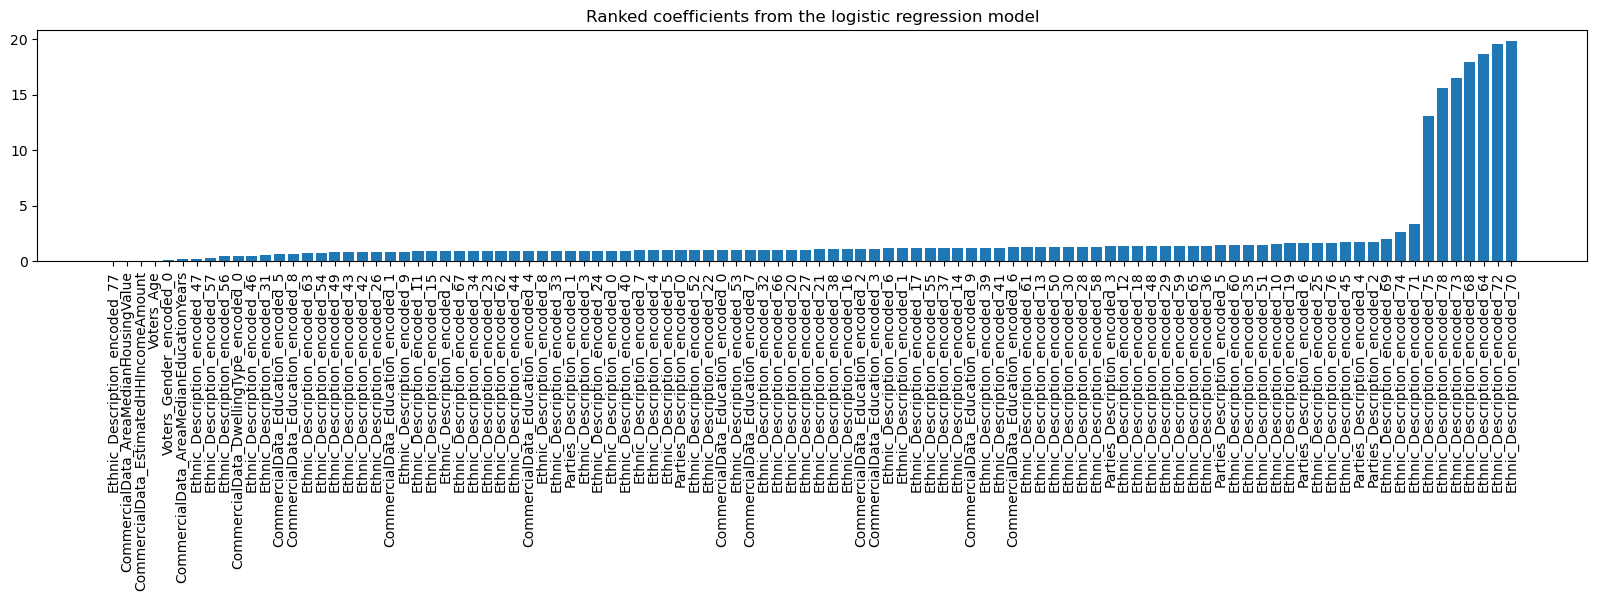

In [53]:
plt.rcParams["figure.figsize"] = (20,3)

plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

We can find that `Residence_Addresses_Property_LandSQ_Footage` and `CommercialData_EstimatedHHIncomeAmount` are ineffective

In [54]:
# # Calculate precision and recall
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))

# # Find weighted precision
# multi_evaluator = MulticlassClassificationEvaluator()
# weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})